In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## How many vehicles were sold in 2018 in total?





In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns

ev_sales = pd.read_csv('Data/ev_sales.csv')
private_ev_charging = pd.read_csv('Data/private_ev_charging.csv')
public_ev_charging = pd.read_csv('Data/public_ev_charging.csv')
ev_sales_2018 = ev_sales[ev_sales['year'] == 2018]['sales'].sum()
print(ev_sales_2018)

combined_ev = pd.merge_ordered(private_ev_charging, public_ev_charging, on='year', how='inner')
aggregated_sales=ev_sales.groupby('year').agg({'sales':'sum'}).reset_index()
combined_ev=combined_ev.merge(aggregated_sales,on='year',how='left')


361315.0


## Plot trends for private ports, public ports, and sales

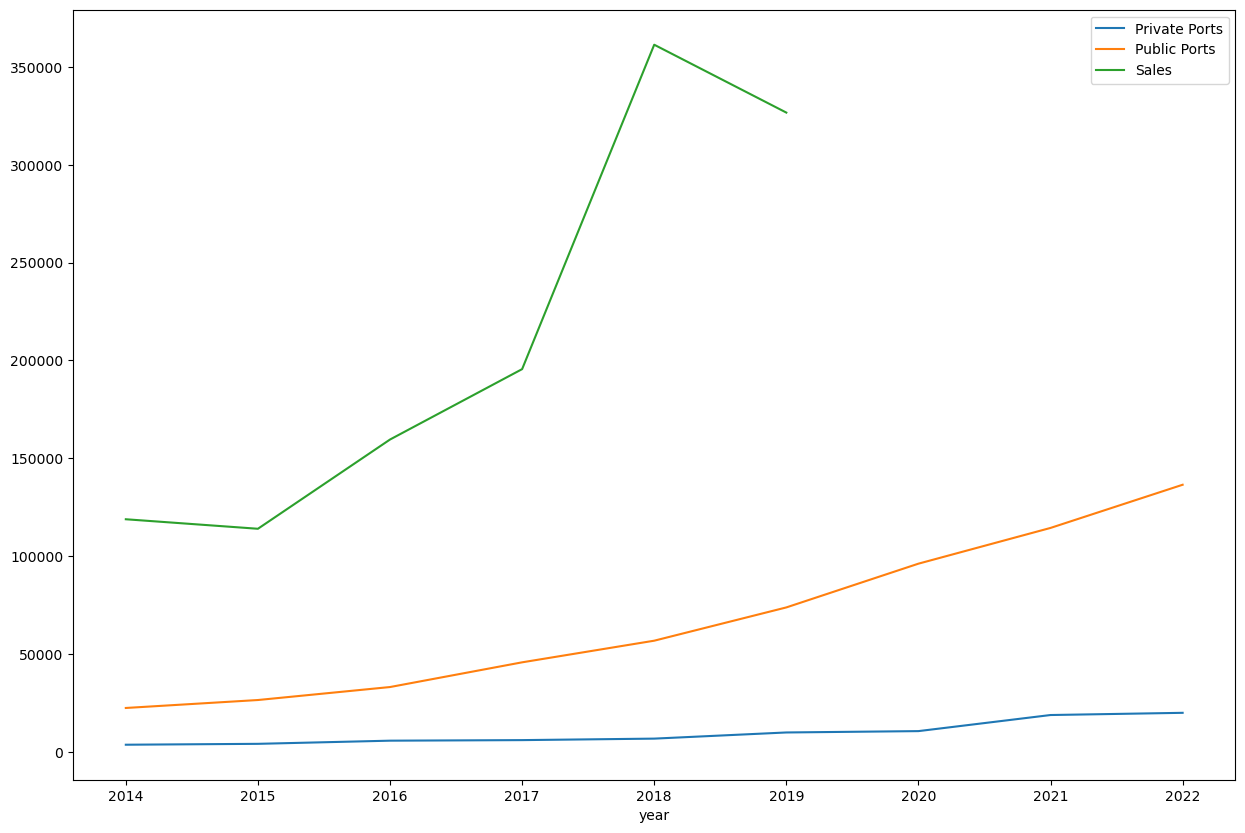

In [7]:
fig, ax = plt.subplots()
sns.lineplot(data=combined_ev, x='year', y='private_ports', label='Private Ports', ax=ax)
sns.lineplot(data=combined_ev, x='year', y='public_ports', label='Public Ports', ax=ax)
sns.lineplot(data=combined_ev, x='year', y='sales', label='Sales', ax=ax)
ax.legend()
ax.set_ylabel('')
fig.set_size_inches(15, 10)
